Model akutne mijeloidne leukemije

$$\dot{x}_{1} = \rho_{S}x_{1}\left(K_{1} - x_{1}\right) - \delta_{S}x_{1}$$

$$\dot{x}_{2} = \delta_{S}x_{1} + \rho_{A}x_{2}\left(K_{2} - x_{2} - x_{4}\right) - \delta_{A}x_{2}$$

$$\dot{x}_{3} = \delta_{A}x_{2} - \mu_{D}x_{3}$$

$$\dot{x}_{4} = \rho_{L}x_{4}\left(K_{2} - x_{2} - x_{4}\right) - \delta_{L}x_{4} - \frac{\alpha x_{4}}{\gamma + x_{4}} - ux_{4}$$

$$\dot{x}_{5} = \delta_{L}x_{4} - \mu_{T}x_{5}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


In [2]:
# Definisanje parametara

rho_s = 0.5
rho_a = 0.43
rho_l = 0.27

delta_s = 0.5
delta_a = 0.44
delta_l = 0.275

mi_d = 0.275
mi_t = 0.3

K1 = 1
K2 = 1

alpha = 0.015
gamma = 0.01

tf = 50
Ts = 0.001

a1 = 1
a2 = 1
w = 0.9

In [3]:
# Početni uslovi
S0 = 0.72
A0 = 0.3255
D0 = 0.5207
L0 = 0.3715
T0 = 0.0619

In [4]:
t = np.arange(0, tf, Ts)

In [5]:
N = len(t)

x = np.zeros((N, 5))
x[0, 0] = S0
x[0, 1] = A0
x[0, 2] = D0
x[0, 3] = L0
x[0, 4] = T0

u = np.zeros((N, 1))
p = np.zeros((N, 5))

In [6]:
def dot_x1(x: np.ndarray, u: np.float64):
    return rho_s * x[0] * (K1 - x[0]) - delta_s * x[0]


def dot_x2(x: np.ndarray, u: np.float64):
    return rho_s * x[0] + rho_a * x[1] * (K2 - x[1] - x[3]) - delta_a * x[1]


def dot_x3(x: np.ndarray, u: np.float64):
    return delta_a * x[1] - mi_d * x[2]


def dot_x4(x: np.ndarray, u: np.float64):
    return (
        rho_l * x[3] * (K2 - x[1] - x[3])
        - delta_l * x[3]
        - alpha * x[3] / (gamma + x[3])
        - u * x[3]
    )


def dot_x5(x: np.ndarray, u: np.float64):
    return delta_l * x[3] - mi_t * x[4]

In [7]:
def dot_p1(x: np.ndarray, p: np.ndarray, u: np.float64):
    return -(rho_s * K1 - 2 * rho_s * x[0] - delta_s) * p[0] - rho_s * p[1]


def dot_p2(x: np.ndarray, p: np.ndarray, u: np.float64):
    return (
        -(rho_a * K2 - 2 * rho_a * x[1] - rho_a * x[3] - delta_a) * p[1]
        - delta_a * p[2]
        + rho_l * p[3] * x[3]
    )


def dot_p3(x: np.ndarray, p: np.ndarray, u: np.float64):
    return mi_d * p[2]


def dot_p4(x: np.ndarray, p: np.ndarray, u: np.float64):
    return (
        -a2
        + rho_a * p[1] * x[1]
        - (
            rho_l * K2
            - rho_l * x[1]
            - 2 * rho_l * x[3]
            - delta_l
            - alpha * gamma / ((gamma + x[3]) ** 2)
            - u
        )
        * p[3]
        - delta_l * p[4]
    )


def dot_p5(x: np.ndarray, p: np.ndarray, u: np.float64):
    return mi_t * p[4]

In [ ]:
eps = 1e-5
iters = 0

while iters <= 10000:
    iters += 1
    print(f"Iteration {iters}...")
    u_old = u.copy()

    for i in range(N - 1):
        xp_1 = x[i, 0] + Ts * dot_x1(x[i], u[i])
        xp_2 = x[i, 1] + Ts * dot_x2(x[i], u[i])
        xp_3 = x[i, 2] + Ts * dot_x3(x[i], u[i])
        xp_4 = x[i, 3] + Ts * dot_x4(x[i], u[i])
        xp_5 = x[i, 4] + Ts * dot_x5(x[i], u[i])
        xp = [xp_1, xp_2, xp_3, xp_4, xp_5]

        x[i + 1, 0] = x[i, 0] + Ts / 2 * (dot_x1(x[i], u[i]) + dot_x1(xp, u[i + 1]))
        x[i + 1, 1] = x[i, 1] + Ts / 2 * (dot_x2(x[i], u[i]) + dot_x2(xp, u[i + 1]))
        x[i + 1, 2] = x[i, 2] + Ts / 2 * (dot_x3(x[i], u[i]) + dot_x3(xp, u[i + 1]))
        x[i + 1, 3] = x[i, 3] + Ts / 2 * (dot_x4(x[i], u[i]) + dot_x4(xp, u[i + 1]))
        x[i + 1, 4] = x[i, 4] + Ts / 2 * (dot_x5(x[i], u[i]) + dot_x5(xp, u[i + 1]))

    for i in range(N - 1):
        p[N - 2 - i, 0] = p[N - 1 - i, 0] - Ts * dot_p1(
            x[N - 1 - i], p[N - 1 - i], u[N - 1 - i]
        )
        p[N - 2 - i, 1] = p[N - 1 - i, 1] - Ts * dot_p2(
            x[N - 1 - i], p[N - 1 - i], u[N - 1 - i]
        )
        p[N - 2 - i, 2] = p[N - 1 - i, 2] - Ts * dot_p3(
            x[N - 1 - i], p[N - 1 - i], u[N - 1 - i]
        )
        p[N - 2 - i, 3] = p[N - 1 - i, 3] - Ts * dot_p4(
            x[N - 1 - i], p[N - 1 - i], u[N - 1 - i]
        )
        p[N - 2 - i, 4] = p[N - 1 - i, 4] - Ts * dot_p5(
            x[N - 1 - i], p[N - 1 - i], u[N - 1 - i]
        )

    # Control update
    for i in range(N):
        if a1 - p[i, 3] * x[i, 3] > 0:
            u_new = 0
        else:
            u_new = 1
        u[i] = w**iters * u[i] + (1 - w**iters) * u_new

    if sum(np.abs(u - u_old)) - eps * sum(np.abs(u)) <= 0:
        break

Iteration 1...
Iteration 2...
Iteration 3...
Iteration 4...
Iteration 5...
Iteration 6...
Iteration 7...
Iteration 8...
Iteration 9...
Iteration 10...
Iteration 11...
Iteration 12...
Iteration 13...
Iteration 14...
Iteration 15...
Iteration 16...
Iteration 17...
Iteration 18...
Iteration 19...
Iteration 20...
Iteration 21...
Iteration 22...
Iteration 23...
Iteration 24...
Iteration 25...
Iteration 26...
Iteration 27...
Iteration 28...
Iteration 29...
Iteration 30...
Iteration 31...
Iteration 32...
Iteration 33...
Iteration 34...
Iteration 35...
Iteration 36...
Iteration 37...
Iteration 38...
Iteration 39...
Iteration 40...
Iteration 41...
Iteration 42...
Iteration 43...
Iteration 44...
Iteration 45...
Iteration 46...
Iteration 47...
Iteration 48...
Iteration 49...
Iteration 50...
Iteration 51...
Iteration 52...
Iteration 53...
Iteration 54...
Iteration 55...
Iteration 56...
Iteration 57...
Iteration 58...
Iteration 59...
Iteration 60...
Iteration 61...
Iteration 62...
Iteration 63...
I

In [33]:
plt.rcParams["text.usetex"] = True

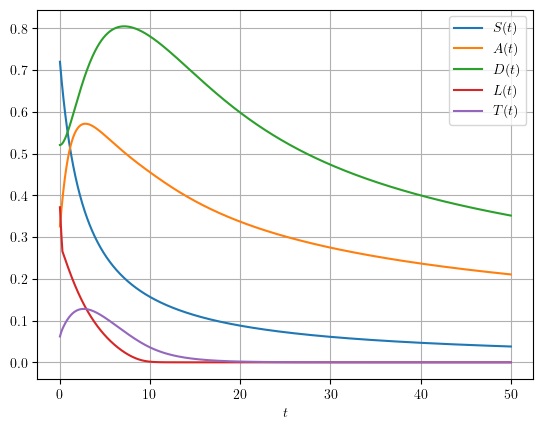

In [34]:
plt.plot(t, x)
plt.grid()
plt.legend([r"$S(t)$", r"$A(t)$", r"$D(t)$", r"$L(t)$", r"$T(t)$"])
plt.xlabel(r"$t$")
plt.savefig("leukemia_ss.png", dpi=300)

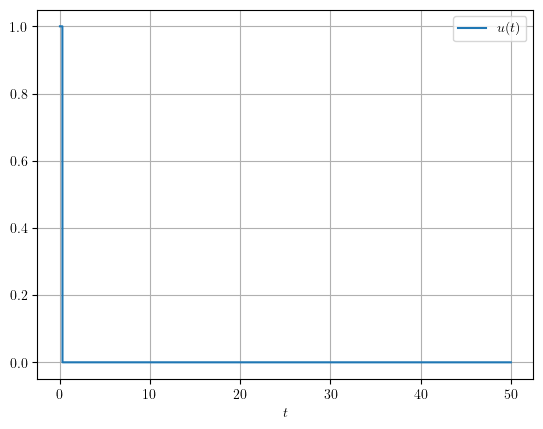

In [36]:
plt.plot(t, u)
plt.grid()
plt.xlabel(r"$t$")
plt.legend([r"$u(t)$"])
plt.savefig("leukemia_control.png", dpi=300)